In [1]:
# import packages
import numpy as np
import math
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as const

from orbvel import v_init, f
from rungekutte import rk4
from config import *

In [2]:
# R0 = np.array([r0, phi0], object)

# # initialize arrays for t, orbital elements
# ti = t0
# t = np.array(ti)
# Ri = R0
# R = np.array([Ri])

# debug = True
# # break if r goes outside tolerance
# r_check = Ri[0]


# runtime initial conditions
t0, tmax = 0, 10
h = 1e-3

# starting position of second galaxy 
r0 = p   
phi0 = -np.arccos((p - r0)/(r0*e))

# make sure r is close to analytic value over time
dr_tol = 1e-5  # allowable error 

# starting position of second galaxy 
r0 = p   #for circular orbit
phi0 = -np.arccos((p - r0)/(r0*e))
    
# starting velocity of the second galaxy
v0 = v_init(r0, phi0)
vx0, vy0 = v0[0],v0[1]

# make sure r is close to analytic value over time
dr_tol = 1e-5  # allowable error 

In [3]:
#def rk4(m0, m1, t0, tmax, r0, phi0, f, h, dr_tol, r_ref):
R, err = rk4(t0, tmax, r0, phi0, f, h, dr_tol, a)
x = R[:,0]
y = R[:,1]

In [4]:
x, y

(array([6.123234e-17]), array([6.123234e-17]))

(Text(0.5, 0, 'time [Myr]'), Text(0, 0.5, 'relative error'))

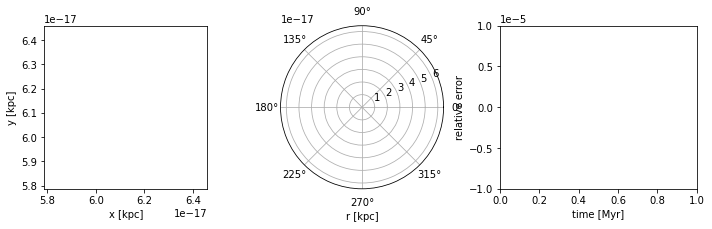

In [5]:
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131, aspect='equal')
ax1.plot(x,y)
ax1.set_xlabel("x [kpc]"), ax1.set_ylabel("y [kpc]")

ax2 = fig.add_subplot(132, projection='polar')
ax2.plot(R[:,1], R[:,0])
ax2.set_xlabel("r [kpc]")

ax3 = fig.add_subplot(133,aspect='auto')
#ax3.scatter(np.arange(t0, tmax+h, h), err, s=1)
ax3.set_ylim(dr_tol*np.array([-1,1]))
ax3.set_xlabel("time [Myr]"), ax3.set_ylabel("relative error")